In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('fake_bills.csv', delimiter=';')

In [5]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [7]:
df['is_genuine'] = df['is_genuine'].astype(int)

In [8]:
df['is_genuine'].value_counts()

is_genuine
1    1000
0     500
Name: count, dtype: int64

In [9]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [10]:
df['margin_low'] = df['margin_low'].fillna(df['margin_low'].mean())

In [11]:
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [12]:
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

<Axes: >

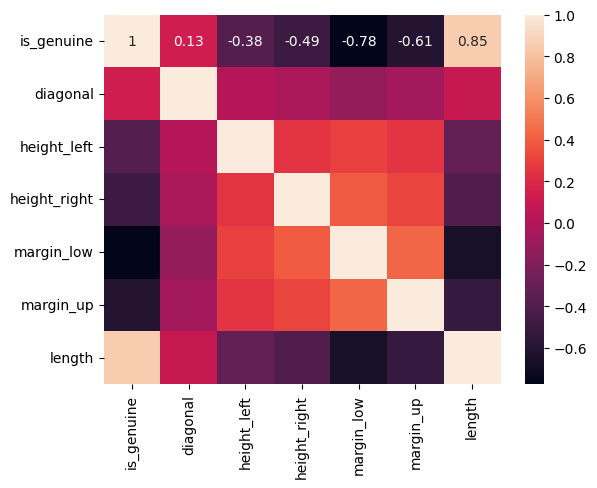

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
X = df.drop('is_genuine', axis=1)
y = df['is_genuine']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
knn_pred = knn.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
print(accuracy_score(y_test, knn_pred))

0.9844444444444445


In [23]:
print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))

[[156   5]
 [  2 287]]


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       161
           1       0.98      0.99      0.99       289

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [24]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(knn_pred_i != y_test))

Text(0, 0.5, 'Error Rate')

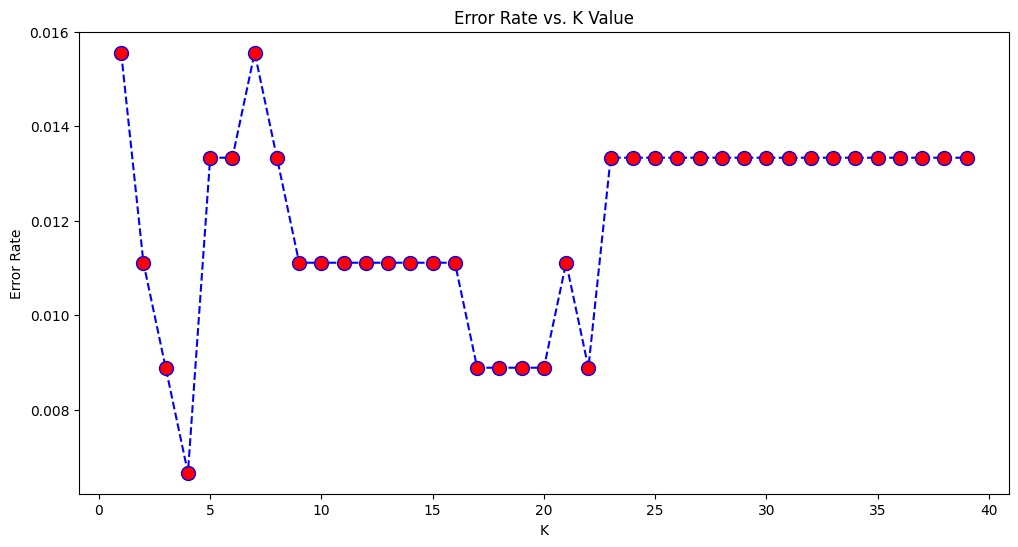

In [25]:
plt.figure(figsize=(12, 6))

plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)


plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [26]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [27]:
print('WITH K = 4')
print("\n")
print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))

WITH K = 4


[[159   2]
 [  1 288]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       161
           1       0.99      1.00      0.99       289

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

